In [21]:
from ect.optimization import MultimodalGenerator, ECTFullOptimizer, snr, l1dist
from ect.optimization import RandUnimodalGenerator
from ect.helpers import Mode
from matplotlib import pyplot as plt

In [22]:
# mode = [Mode(100, 45), Mode(100, -45)]
# mode = [Mode(20*x, 90-9*x, 1) for x in range(1,20)]
mode = [Mode(100/x, 9*x, 1) for x in range(1, 20)]
gen = MultimodalGenerator(mode, offset=10)
# gen = RandUnimodalGenerator(offset=5, iterlen=3)
opt = ECTFullOptimizer(gen, snr, offset=10, ect_offset=5, n_knots=20)

2024-04-30 07:19:33.124 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-04-30 07:19:33.125 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


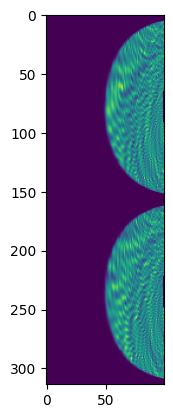

In [23]:
plt.imshow(gen.generate())

In [24]:
r = opt.optim(method="Nelder-Mead", options={"adaptive":True, "maxiter":1e7})

# import json
# print(json.dumps(r))

Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790
Current loss=-12.790


KeyboardInterrupt: 

In [12]:
r

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -13.228126355838283
             x: [ 3.226e+00 -2.095e+00 ...  3.982e-01  1.131e-01]
           nit: 75297
          nfev: 91161
 final_simplex: (array([[ 3.226e+00, -2.095e+00, ...,  3.982e-01,
                         1.131e-01],
                       [ 3.226e+00, -2.095e+00, ...,  3.982e-01,
                         1.131e-01],
                       ...,
                       [ 3.226e+00, -2.095e+00, ...,  3.982e-01,
                         1.131e-01],
                       [ 3.226e+00, -2.095e+00, ...,  3.982e-01,
                         1.131e-01]]), array([-1.323e+01, -1.323e+01, ..., -1.323e+01, -1.323e+01]))

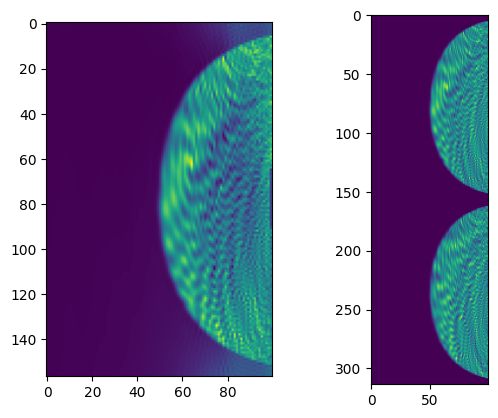

In [13]:
plt.subplot(1,2,1)
plt.imshow(opt.inv)

plt.subplot(1,2,2)
plt.imshow(opt.image.generate())

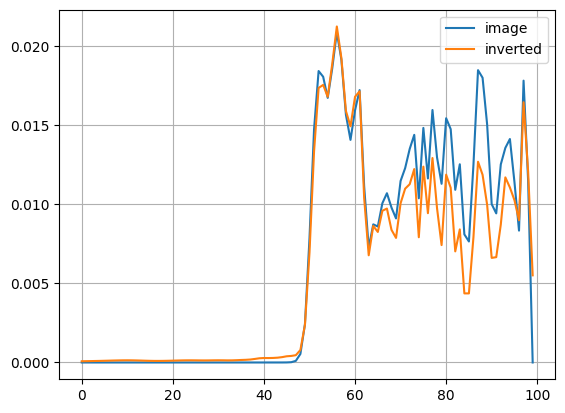

In [14]:
import cv2
P, _ = opt.image.generate().shape
inorm = cv2.normalize(opt.image.generate()[:P//2, :], None, 1, 0, cv2.NORM_L2)
invnorm = cv2.normalize(opt.inv, None, 1, 0, cv2.NORM_L2)

plt.plot(inorm[78, :])
plt.plot(invnorm[78, :])
plt.legend(["image", "inverted"])
plt.grid()

from ect.optimization import snr
from icecream import ic
# ic(snr(inorm, invnorm))

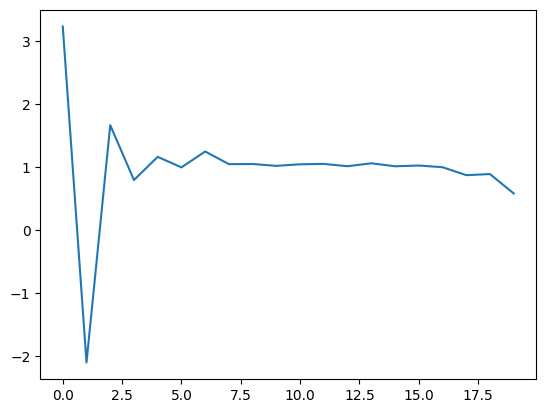

In [15]:
plt.plot(r["x"][:20])

In [18]:
old_fnf = [3.183, -2.054, 1.522, 0.821, 1.511, 0.907, 1.114, 0.934, 1.085, 1.063, 0.979, 1.051, 0.941, 1.005, 0.983, 0.978, 1.079, 1.027, 0.818, 0.608]

fnf = r["x"][:20]
print(f"[{', '.join(f'{x:.3f}' for x, y in zip(fnf, old_fnf))}]")

[3.226, -2.095, 1.663, 0.794, 1.161, 0.994, 1.246, 1.046, 1.048, 1.018, 1.043, 1.049, 1.013, 1.059, 1.012, 1.024, 0.997, 0.871, 0.888, 0.582]


In [19]:
old_snf = [1.747, 1.743, 1.731, 1.724, 1.708, 1.710, 1.728, 1.723, 1.752, 1.749, 1.762, 1.862, 1.888, 1.894, 1.850, 1.861, 1.720, 1.650, 1.578, 1.202]


snf = r["x"][20:40]
print(f"[{', '.join(f'{x:.3f}' for x,y in zip(old_snf, snf))}]")

[1.747, 1.743, 1.731, 1.724, 1.708, 1.710, 1.728, 1.723, 1.752, 1.749, 1.762, 1.862, 1.888, 1.894, 1.850, 1.861, 1.720, 1.650, 1.578, 1.202]


[0.39824856 0.11306874]


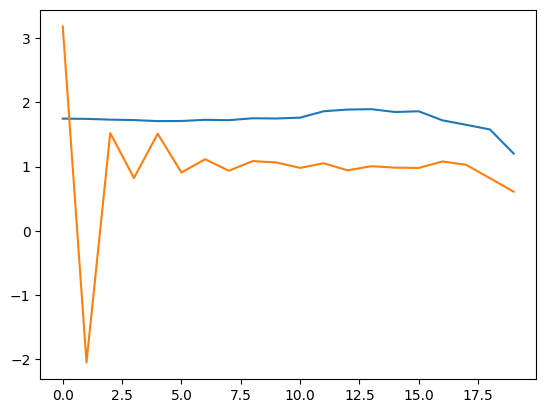

In [20]:
plt.plot(old_snf)
plt.plot(old_fnf)

print(r["x"][40:])